# Population analysis

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from sithom.plot import plot_defaults, label_subplots
from src.constants import path_to_pop_density
plot_defaults()

In [3]:
var = "UN WPP-Adjusted Population Density, v4.11 (2000, 2005, 2010, 2015, 2020): 2.5 arc-minutes"

In [4]:
ds = xr.open_dataset(path_to_pop_density)

In [5]:
ds

<xarray.Dataset>
Dimensions:                                                                                    (
                                                                                                longitude: 8640,
                                                                                                latitude: 4320,
                                                                                                raster: 20)
Coordinates:
  * longitude                                                                                  (longitude) float64 ...
  * latitude                                                                                   (latitude) float64 ...
  * raster                                                                                     (raster) int32 ...
Data variables:
    UN WPP-Adjusted Population Density, v4.11 (2000, 2005, 2010, 2015, 2020): 2.5 arc-minutes  (raster, latitude, longitude) float32 ...
Attributes:
    proj4:        +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0...
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 2.8-4)
    date:         2018-11-16 10:19:19

In [6]:
for i in ds.isel(raster=2):
    print(i)

UN WPP-Adjusted Population Density, v4.11 (2000, 2005, 2010, 2015, 2020): 2.5 arc-minutes


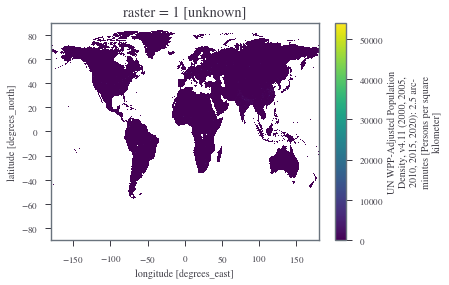

In [7]:
ds[var].isel(raster=0).plot()

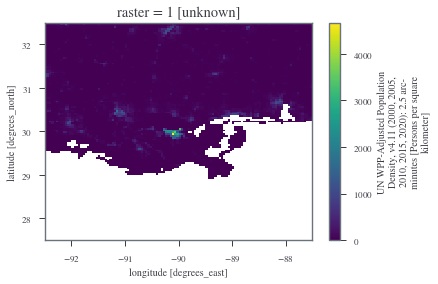

In [8]:
ds[var].isel(raster=0).sel(longitude=slice(-92.5, -87.5), latitude=slice(32.5,27.5)).plot()

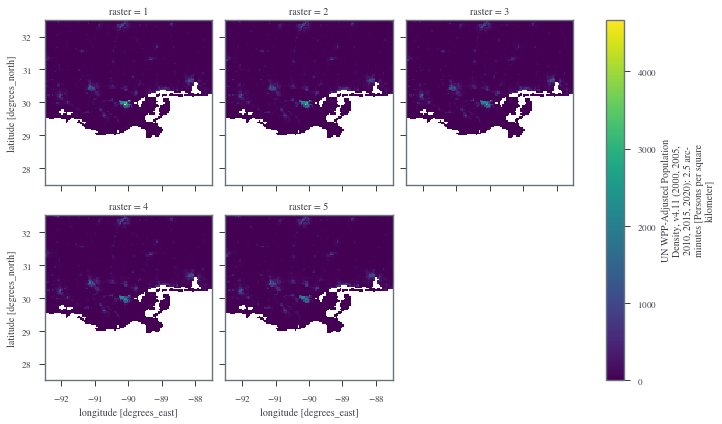

In [9]:
ds[var].isel(raster=slice(0,5)).sel(longitude=slice(-92.5, -87.5), latitude=slice(32.5,27.5)).plot(col="raster", col_wrap=3)

In [10]:
from sithom.xr import plot_units
count = (ds[var].isel(raster=slice(0,5)).sel(latitude=slice(20,-20)) * ds[var].sel(raster=9).sel(latitude=slice(20,-20)).drop("raster")).rename("UN WPP Population") 
# .sum(dim=["longitude", "latitude"])
count = count.rename({"raster": "year"})
count = count.assign_coords(year=([2000, 2005, 2010, 2015, 2020]))

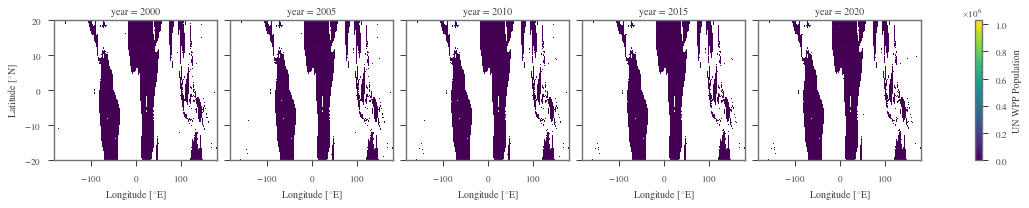

In [11]:
plot_units(count).plot(col="year")

([<matplotlib.axis.XTick at 0x7fdb8c4ef790>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

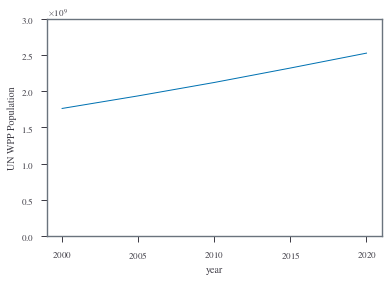

In [12]:
from sithom.plot import axis_formatter
count.sum(dim=["longitude", "latitude"]).plot()
plt.gca().ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
plt.ylim(0, 3e9)
plt.xticks([2000, 2005, 2010, 2015, 2020])

In [13]:
ds[var].isel(raster=9).sel(latitude=slice(20,-20)).drop("raster")

<xarray.DataArray 'UN WPP-Adjusted Population Density, v4.11 (2000, 2005, 2010, 2015, 2020): 2.5 arc-minutes' (
                                                                                                               latitude: 960,
                                                                                                               longitude: 8640)>
[8294400 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float64 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * latitude   (latitude) float64 19.98 19.94 19.9 19.85 ... -19.9 -19.94 -19.98
Attributes:
    units:      Persons per square kilometer
    long_name:  UN WPP-Adjusted Population Density, v4.11 (2000, 2005, 2010, ...
    min:        [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.00...
    max:        [5.40057148e+04 5.65191953e+04 6.34500156e+04 7.88195078e+04\...

([<matplotlib.axis.XTick at 0x7fdb7e6399d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

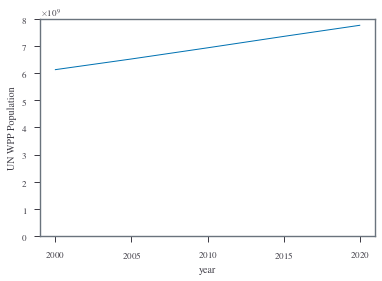

In [14]:
count_all = (ds[var].isel(raster=slice(0,5)) * ds[var].sel(raster=9).drop("raster")).rename("UN WPP Population") 
# .sum(dim=["longitude", "latitude"])
count_all = count_all.rename({"raster": "year"})
count_all = count_all.assign_coords(year=([2000, 2005, 2010, 2015, 2020]))

count_all.sum(dim=["longitude", "latitude"]).plot()
plt.gca().ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
plt.ylim(0, 8e9)
plt.xticks([2000, 2005, 2010, 2015, 2020])

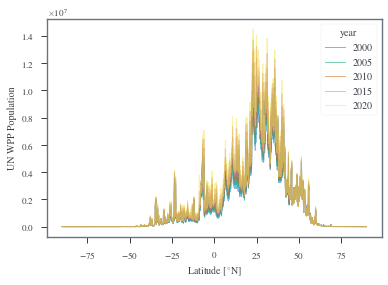

In [15]:
plot_units(count_all.sum(dim="longitude")).plot.line(hue="year", alpha=0.5)
plt.gca().ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)

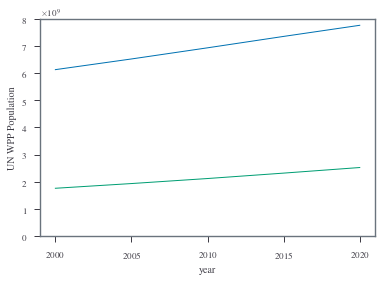

In [16]:
count_all.sum(dim=["longitude", "latitude"]).plot()
count_all.sel(latitude=slice(20,-20)).sum(dim=["longitude", "latitude"]).plot()
plt.ylim(0, 8e9)
plt.xticks([2000, 2005, 2010, 2015, 2020])
plt.gca().ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)

(0.0, 1.0)

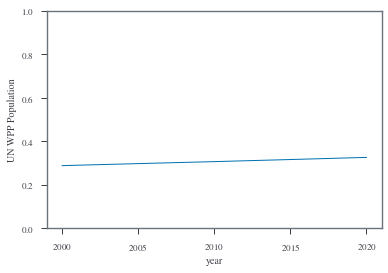

In [17]:
(count_all.sel(latitude=slice(20,-20)).sum(dim=["longitude", "latitude"]) / count_all.sum(dim=["longitude", "latitude"])).plot()
plt.xticks([2000, 2005, 2010, 2015, 2020])
plt.ylim(0,1)

In [18]:
count_all.sel(latitude=slice(20,-20)).sum(dim=["longitude", "latitude"]) / count_all.sum(dim=["longitude", "latitude"])

<xarray.DataArray 'UN WPP Population' (year: 5)>
array([0.28759682, 0.2968934 , 0.306002  , 0.31563368, 0.3255012 ],
      dtype=float32)
Coordinates:
  * year     (year) int64 2000 2005 2010 2015 2020

In [19]:
count_all.sel(latitude=slice(20,-20)).sum(dim=["longitude", "latitude"])


<xarray.DataArray 'UN WPP Population' (year: 5)>
array([1.7619681e+09, 1.9356014e+09, 2.1204699e+09, 2.3196943e+09,
       2.5252293e+09], dtype=float32)
Coordinates:
  * year     (year) int64 2000 2005 2010 2015 2020

In [20]:
count_all.sum(dim=["longitude", "latitude"])

<xarray.DataArray 'UN WPP Population' (year: 5)>
array([6.1265219e+09, 6.5195167e+09, 6.9295949e+09, 7.3493243e+09,
       7.7579720e+09], dtype=float32)
Coordinates:
  * year     (year) int64 2000 2005 2010 2015 2020